In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd

In [3]:
df = pd.read_csv('./drive/MyDrive/Colab Notebooks/data/train.csv')
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


# EDA

In [4]:
import seaborn as sns
from matplotlib import pyplot as plt

In [5]:
df.isna().sum()

,0
datetime,0
season,0
holiday,0
workingday,0
weather,0
temp,0
atemp,0
humidity,0
windspeed,0
casual,0


In [6]:
df.dtypes

,0
datetime,object
season,int64
holiday,int64
workingday,int64
weather,int64
temp,float64
atemp,float64
humidity,int64
windspeed,float64
casual,int64


In [8]:
from sklearn.impute import KNNImputer
numeric_cols = df.select_dtypes(include=["number"]).columns
non_numeric_cols = df.select_dtypes(exclude=["number"]).columns

imputer = KNNImputer(n_neighbors=3)
df_numeric_imputed = pd.DataFrame(imputer.fit_transform(df[numeric_cols]), columns=numeric_cols, index=df.index)

df_imputed = pd.concat([df_numeric_imputed, df[non_numeric_cols]], axis=1)

In [9]:
numeric_cols

Index(['season', 'holiday', 'workingday', 'weather', 'temp', 'atemp',
       'humidity', 'windspeed', 'casual', 'registered', 'count'],
      dtype='object')

In [10]:
duplicate_rows = df[df.duplicated()]
num_duplicates = df.duplicated().sum()
df[df.duplicated(keep=False)].sum().sum()
df_cleaned = df.drop_duplicates()

In [11]:
from datetime import datetime

In [12]:
df['datetime'] = pd.to_datetime(df['datetime'])
df['year'] = df['datetime'].dt.year
df['month'] = df['datetime'].dt.month
df['day'] = df['datetime'].dt.day
df['hour'] = df['datetime'].dt.hour
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,3
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,4


In [13]:
df.drop(['casual','registered'],axis=1,inplace=True)

In [37]:
df.dtypes

,0
datetime,datetime64[ns]
season,int64
holiday,int64
workingday,int64
weather,int64
temp,float64
atemp,float64
humidity,int64
windspeed,float64
count,int64


## distribution analysis

<ipython-input-14-6484b9ee2913>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['count'])


<Axes: xlabel='count', ylabel='Density'>

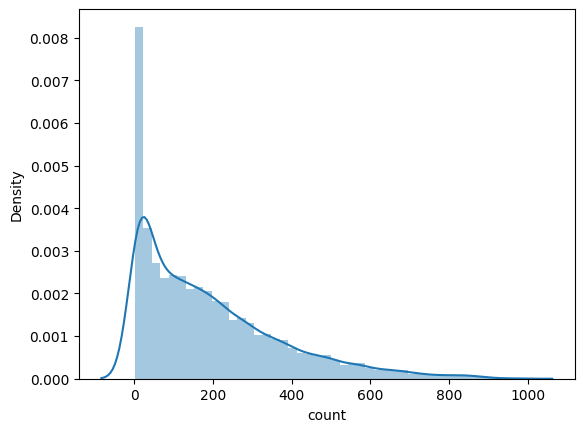

In [14]:
sns.distplot(df['count'])

**When to Transform the Target**
- Transform if:

  - The target has extreme skewness (e.g., skewness > 2 or < -2).
  - The target contains outliers that influence the model excessively.
  - Your regression model relies on normality assumptions or is sensitive to extreme values.

- Do Not Transform if:

  - The model you’re using (e.g., tree-based models like Random Forest or Gradient Boosting) is robust to skewness.
  - Interpretability of predictions in the original scale is crucial- .

In [15]:
numerical_features=['temp','atemp', 'humidity','windspeed','year','month','day','hour']
categorical_features=['season','weather', 'workingday','holiday']

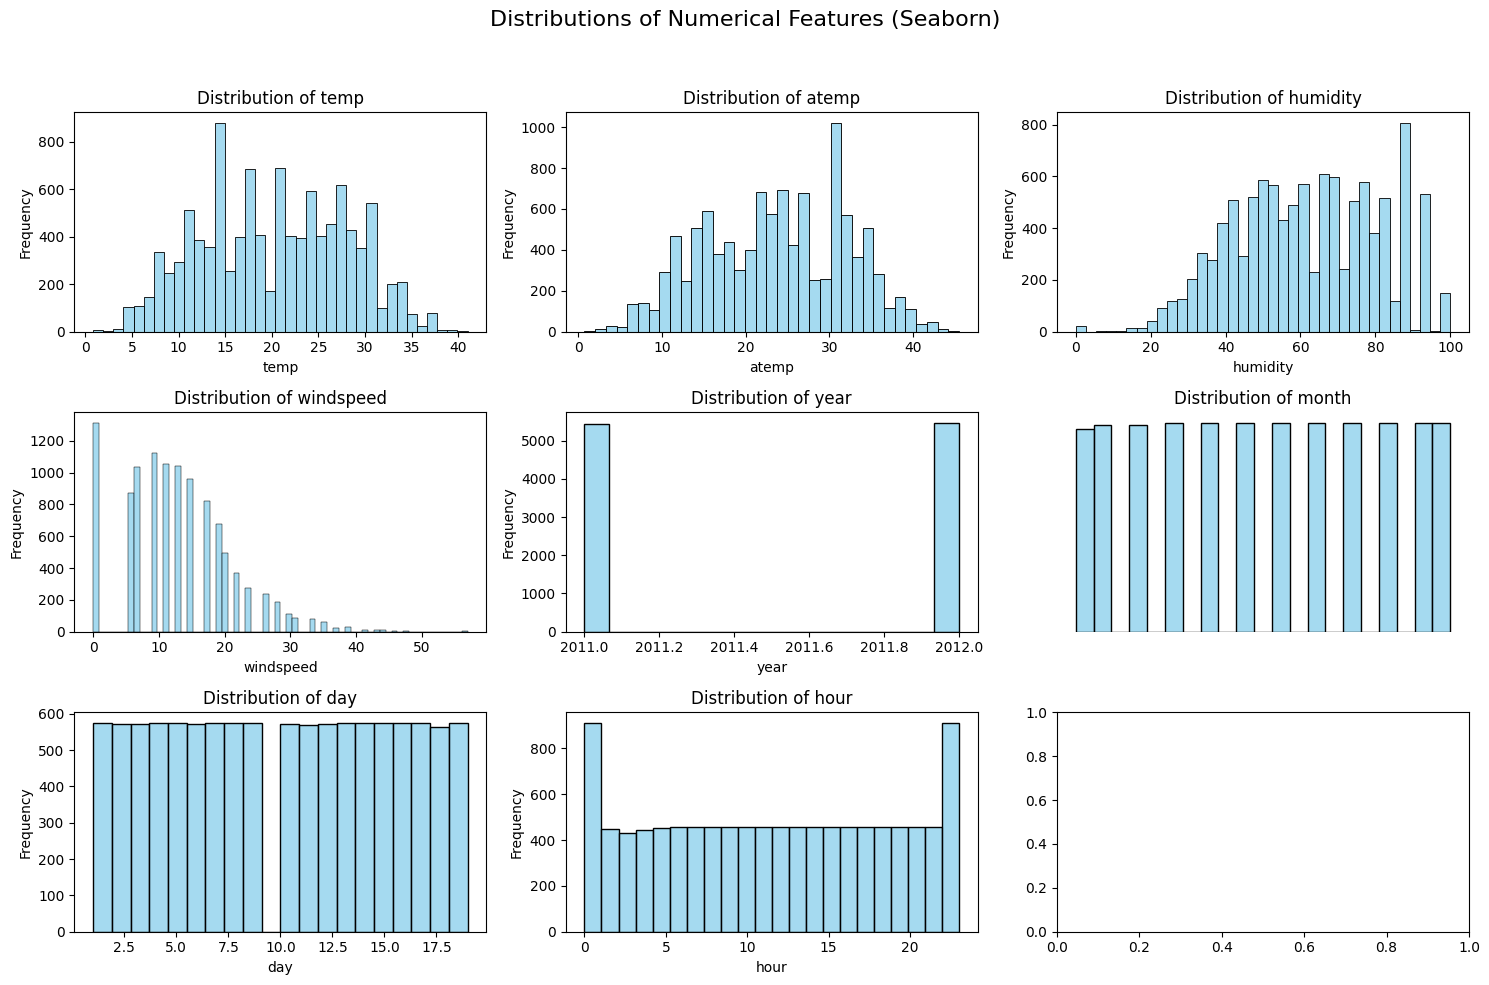

In [17]:
fig, axes = plt.subplots(3, 3, figsize=(15, 10))
fig.suptitle("Distributions of Numerical Features (Seaborn)", fontsize=16)

for i, feature in enumerate(numerical_features):
    ax = axes[i // 3, i % 3]  # Determine subplot position
    sns.histplot(df[feature], kde=False, ax=ax, color='skyblue')
    #sns.distplot(df[feature], kde=True, bins=15, ax=ax, color='skyblue')
    ax.set_title(f"Distribution of {feature}")
    ax.set_xlabel(feature)
    ax.set_ylabel("Frequency")

axes[1, 2].axis("off")

plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust layout to include the title
plt.show()

In [21]:
numerical_features=['temp','atemp', 'humidity','windspeed','count']

In [22]:
from scipy.stats import skew
skewed_features = df[numerical_features].apply(lambda x : skew (x.dropna())).sort_values(ascending=False)
skewness = pd.DataFrame({'Skew' :skewed_features})
skewness

,Skew
count,1.241895
windspeed,0.588685
temp,0.003690
humidity,-0.086323
atemp,-0.102545


In [23]:
from scipy.stats import probplot, boxcox
from collections import defaultdict

In [24]:
r2_scores = defaultdict(tuple)

for feature in numerical_features:
    print(feature)
    orig = df[feature] + 1.0

    _, (*_, R_orig) = probplot(orig, rvalue=True)
    _, (*_, R_log) = probplot(np.log(orig), rvalue=True)
    _, (*_, R_sqrt) = probplot(np.sqrt(orig), rvalue=True)
    _, (*_, R_boxcox) = probplot(boxcox(orig)[0], rvalue=True)
    r2_scores[feature] = (
        R_orig * R_orig,
        R_log * R_log,
        R_sqrt * R_sqrt,
        R_boxcox * R_boxcox
    )

r2_scores = pd.DataFrame(
    r2_scores, index=("Original", "Log", "Sqrt", "BoxCox")
).T

r2_scores["Winner"] = r2_scores.idxmax(axis=1)
r2_scores

temp
atemp
humidity
windspeed
count


,Original,Log,Sqrt,BoxCox,Winner
temp,0.980563,0.943811,0.975418,0.981088,BoxCox
atemp,0.981679,0.933710,0.970869,0.981606,Original
humidity,0.982409,0.836943,0.966676,0.982411,BoxCox
windspeed,0.958774,0.785820,0.941462,0.962367,BoxCox
count,0.878472,0.923866,0.973115,0.977353,BoxCox


Key observations:
1. We only have 1-19 days from each month
2. no need to transform any data

## Correlation analysis

### heatmap

In [25]:
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
royalblue = LinearSegmentedColormap.from_list(
    'royalblue',
    [(0, 1, 1), (0.25, 0.41, 0.88)]  # List of RGB tuples for the colors
)
royalblue_r = royalblue.reversed()

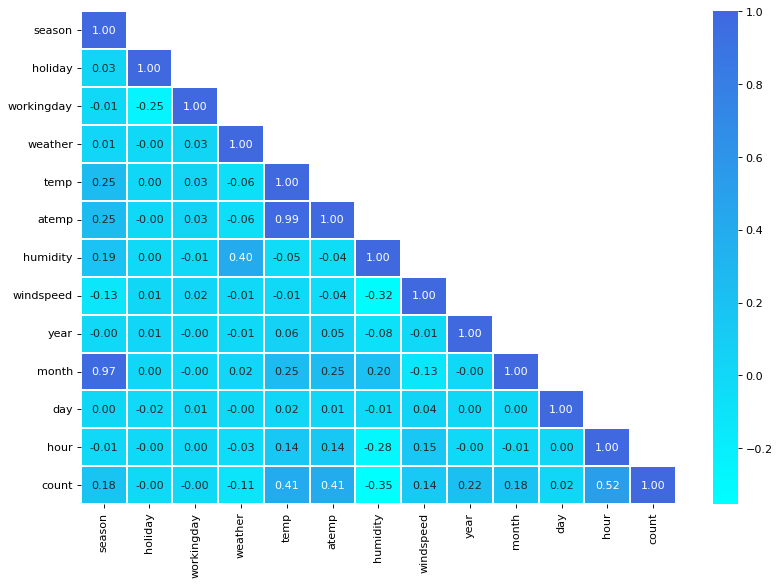

In [26]:
target='count'
df_ordered = pd.concat([df.drop(target,axis=1), df[target]],axis=1)
df_ordered.drop(['datetime'],axis=1,inplace=True)
corr = df_ordered.corr(method='spearman')

# Create a mask so that we see the correlation values only once
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask,1)] = True

# Plot the heatmap correlation
plt.figure(figsize=(12,8), dpi=80)
sns.heatmap(corr, mask=mask, annot=True, cmap=royalblue, fmt='.2f', linewidths=0.2)
plt.show()

Key observation:
1. we should drop temp or atemp
2. strong correlation with hour
3. not very strong correlation with day, but be careful, there may be correlation with workingday/holiday
4. there seems to be NO correlation with holiday and workingday, but it may be that the total share is similar, but the hour-dependent data is very different, so we still need day/holiday/workingday to achieve hourly prediction

### Let's check that. Let's see how categorical data affect target!

In [28]:
categorical_features=['season','weather', 'workingday','holiday']
time_sensitive_features=['hour','day','month','year']

<ipython-input-31-a7402f42655d>:4: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(


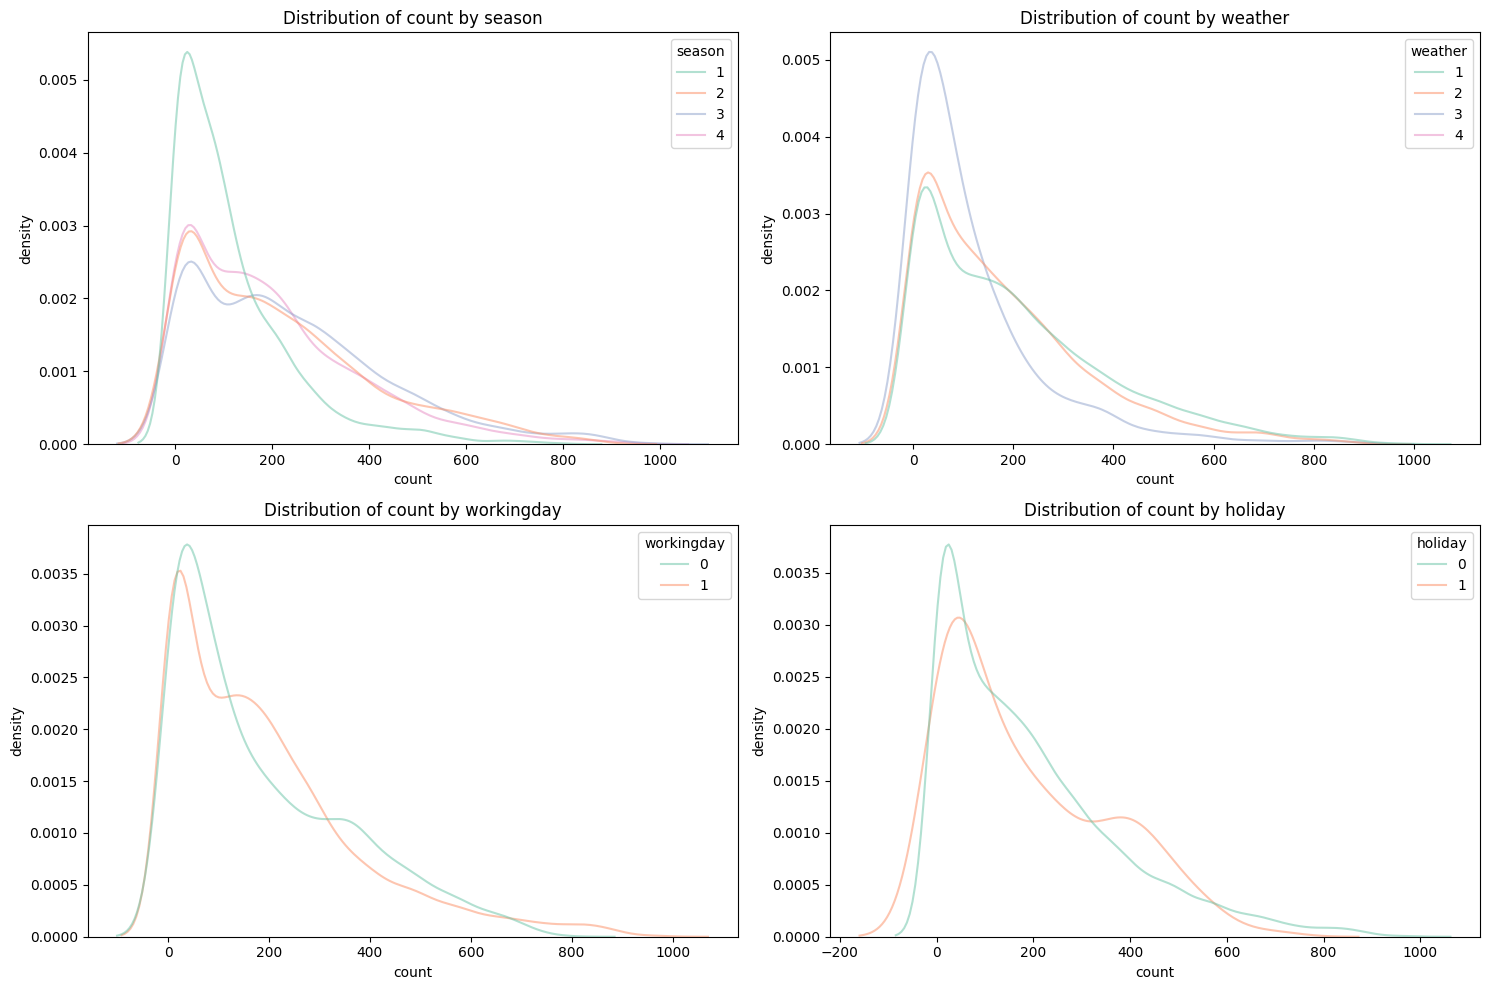

In [31]:
plt.figure(figsize=(15, 10))
for i, feature in enumerate(categorical_features, 1):
    plt.subplot(2, 2, i)
    sns.kdeplot(
        data=df,
        x="count",
        hue=feature,
        fill=False,
        common_norm=False,
        alpha=0.5,
        palette="Set2"
    )
    plt.title(f"Distribution of count by {feature}")
    plt.xlabel("count")
    plt.ylabel("density")

plt.tight_layout()
plt.show()

Key observations:
1. season 1 has smaller rentals
2. bad weather 3/4 has smaller rentals
3. workingday/holiday has to refer to hourly data

#### How does rental hourly/daily changed? (Preliminary time analysis)

In [58]:
df.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,year,month,day,hour
datetime,,,,,,,,,,,,,
2011-01-01 00:00,1,0,0,1,9.84,14.395,81,0.0,16,2011,1,1,0
2011-01-01 01:00,1,0,0,1,9.02,13.635,80,0.0,40,2011,1,1,1
2011-01-01 02:00,1,0,0,1,9.02,13.635,80,0.0,32,2011,1,1,2
2011-01-01 03:00,1,0,0,1,9.84,14.395,75,0.0,13,2011,1,1,3
2011-01-01 04:00,1,0,0,1,9.84,14.395,75,0.0,1,2011,1,1,4


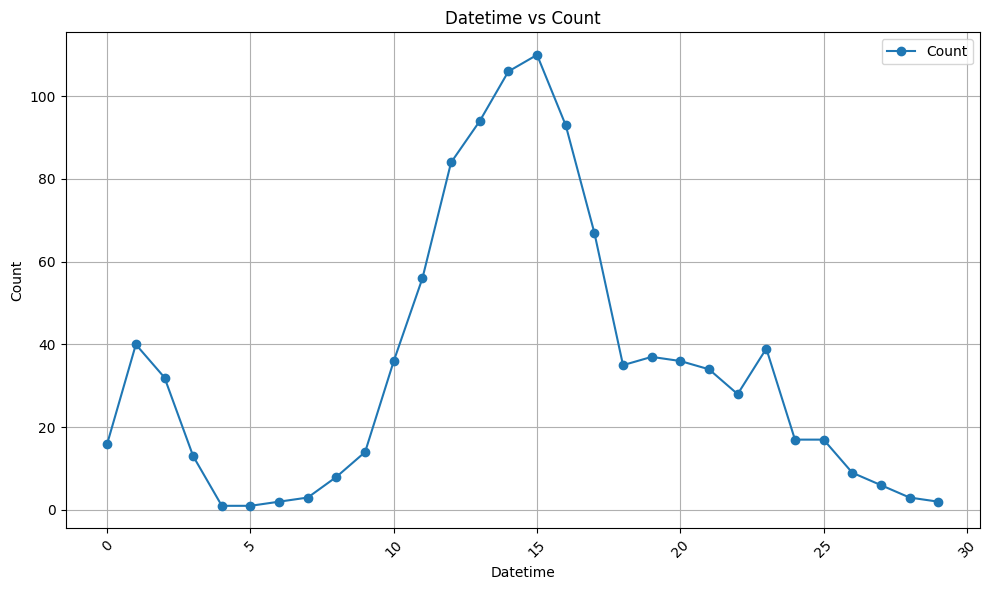

In [32]:
#index = df.index.to_timestamp()
index = df.index
# Now plot
plt.figure(figsize=(10, 6))
plt.plot(index[:30], df["count"][:30], marker="o", linestyle="-", label="Count")
plt.title("Datetime vs Count")
plt.xlabel("Datetime")
plt.ylabel("Count")
plt.grid(True)
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Let's try to do an average

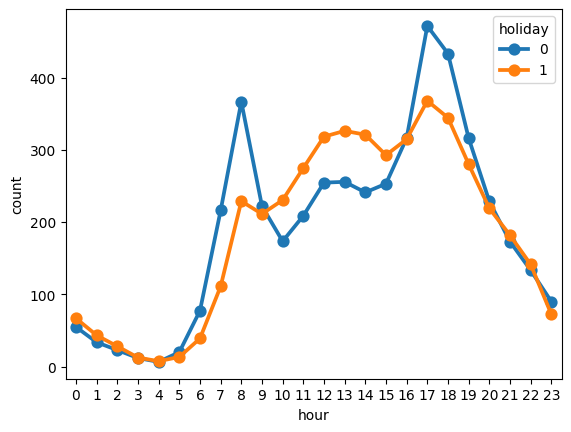

In [33]:
hourly_holiday = df.groupby(["hour","holiday"],sort=True).mean(numeric_only=True).reset_index()
sns.pointplot(data=hourly_holiday, x="hour", y="count",hue="holiday")
plt.show()

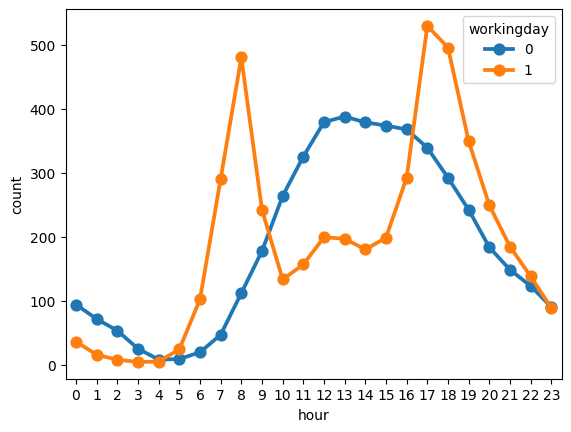

In [34]:
hourly_workingday = df.groupby(["hour","workingday"],sort=True).mean(numeric_only=True).reset_index()
sns.pointplot(data=hourly_workingday, x="hour", y="count",hue="workingday")
plt.show()

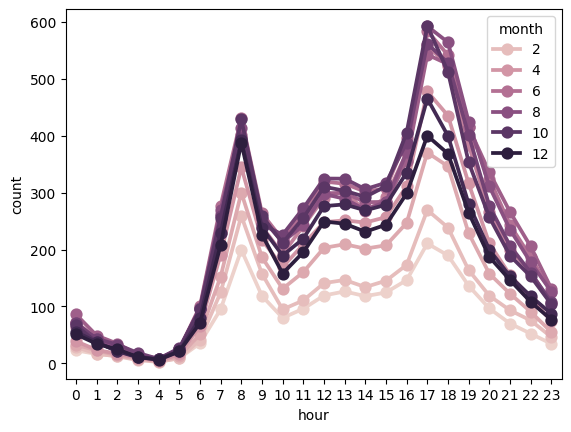

In [81]:
hourly_month = df.groupby(["hour","month"],sort=True).mean(numeric_only=True).reset_index()
sns.pointplot(data=hourly_month, x="hour", y="count",hue="month")
plt.show()

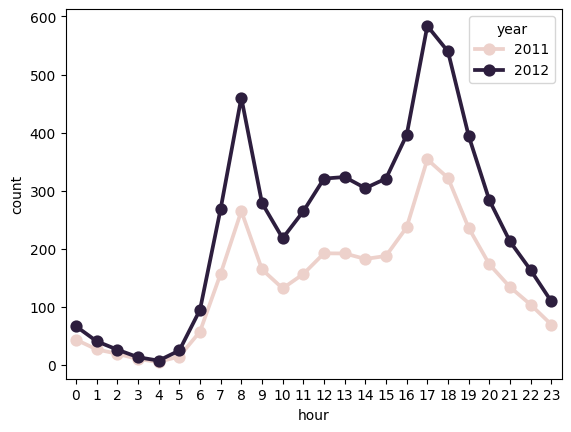

In [35]:
hourly_year = df.groupby(["hour","year"],sort=True).mean(numeric_only=True).reset_index()
sns.pointplot(data=hourly_year, x="hour", y="count",hue="year")
plt.show()

Key observations:
- season, weather, workingday, holiday are all important.
- Month can be replaced by season.
- Year is important
- We chosse houlry plot because hour is most important in prediction

### pair plot with numerical features to check other numerical feature correlations

In [79]:
df.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,year,month,day,hour
datetime,,,,,,,,,,,,,
2011-01-01 00:00,1,0,0,1,9.84,14.395,81,0.0,16,2011,1,1,0
2011-01-01 01:00,1,0,0,1,9.02,13.635,80,0.0,40,2011,1,1,1
2011-01-01 02:00,1,0,0,1,9.02,13.635,80,0.0,32,2011,1,1,2
2011-01-01 03:00,1,0,0,1,9.84,14.395,75,0.0,13,2011,1,1,3
2011-01-01 04:00,1,0,0,1,9.84,14.395,75,0.0,1,2011,1,1,4


In [36]:
numerical_features=['atemp', 'humidity','windspeed',"count"]

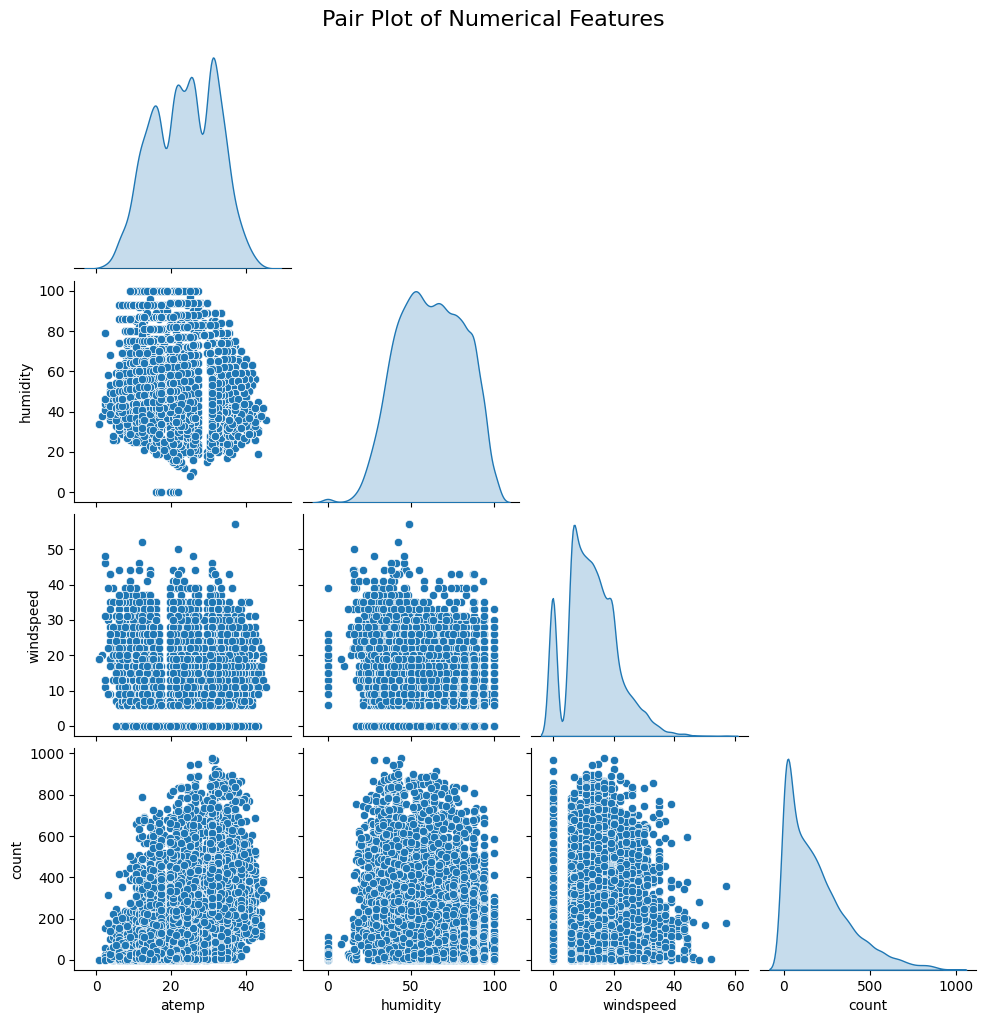

In [37]:
sns.pairplot(df[numerical_features], diag_kind="kde", corner=True, height=2.5)
plt.suptitle("Pair Plot of Numerical Features", y=1.02, fontsize=16)
plt.show()

Key observations
- Humidity = 0 is suspecious, we may consider removing these datapoints
- if we do not remove, temp and humidity are useful. Windspeed is not very useful.
- May consider use categorical data transform

In [ ]:
def categorize_windspeed(windspeed):
    if windspeed == 0:
        return "Calm"
    elif windspeed <= 5:
        return "Light Breeze"
    elif windspeed <= 15:
        return "Moderate Breeze"
    elif windspeed <= 30:
        return "Strong Breeze"
    else:
        return "High Wind"

df["windspeed_category"] = df["windspeed"].apply(categorize_windspeed)

## Time Series analysis

In [84]:
df.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,year,month,day,hour
datetime,,,,,,,,,,,,,
2011-01-01 00:00,1,0,0,1,9.84,14.395,81,0.0,16,2011,1,1,0
2011-01-01 01:00,1,0,0,1,9.02,13.635,80,0.0,40,2011,1,1,1
2011-01-01 02:00,1,0,0,1,9.02,13.635,80,0.0,32,2011,1,1,2
2011-01-01 03:00,1,0,0,1,9.84,14.395,75,0.0,13,2011,1,1,3
2011-01-01 04:00,1,0,0,1,9.84,14.395,75,0.0,1,2011,1,1,4


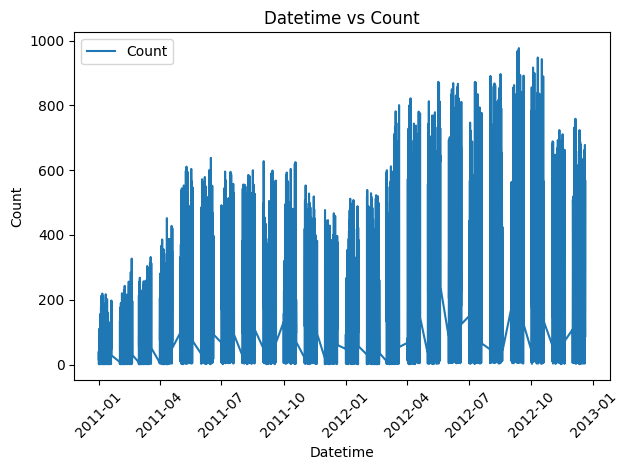

In [87]:
index = df.index.to_timestamp()

# Now plot
plt.figure()
plt.plot(index, df["count"], linestyle="-", label="Count")
plt.title("Datetime vs Count")
plt.xlabel("Datetime")
plt.ylabel("Count")
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [106]:
def plot_periodogram(ts, detrend='linear', ax=None):
    from scipy.signal import periodogram
    fs = pd.Timedelta("365D") / pd.Timedelta("1H")

    freqencies, spectrum = periodogram(
        ts,
        fs=fs,
        detrend=detrend,
        window="boxcar",
        scaling='spectrum',
    )
    if ax is None:
        _, ax = plt.subplots()
    ax.step(freqencies, spectrum, color="purple")
    ax.set_xscale("log")
    ax.set_xticks([1, 4, 12, 52, 365, 730])
    ax.set_xticklabels(
        [
            "Annual (1)",
            "Quarterly (4)",
            "Monthly (12)",
            "Weekly (52)",
            "Daily (365)",
            "Half Daily (730)"
        ],
        rotation=30,
    )
    ax.ticklabel_format(axis="y", style="sci", scilimits=(0, 0))
    ax.set_ylabel("Variance")
    ax.set_title("Periodogram")
    return ax

In [89]:
def seasonal_plot(X, y, period, freq, ax=None):
    if ax is None:
        _, ax = plt.subplots()
    palette = sns.color_palette("husl", n_colors=X[period].nunique(),)
    ax = sns.lineplot(
        x=freq,
        y=y,
        hue=period,
        data=X,
        ci=False,
        ax=ax,
        palette=palette,
        legend=False,
    )
    ax.set_title(f"Seasonal Plot ({period}/{freq})")
    for line, name in zip(ax.lines, X[period].unique()):
        y_ = line.get_ydata()[-1]
        ax.annotate(
            name,
            xy=(1, y_),
            xytext=(6, 0),
            color=line.get_color(),
            xycoords=ax.get_yaxis_transform(),
            textcoords="offset points",
            size=14,
            va="center",
        )
    return ax

<ipython-input-89-dce485a0e5ca>:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', False)` for the same effect.

  ax = sns.lineplot(
<ipython-input-89-dce485a0e5ca>:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', False)` for the same effect.

  ax = sns.lineplot(


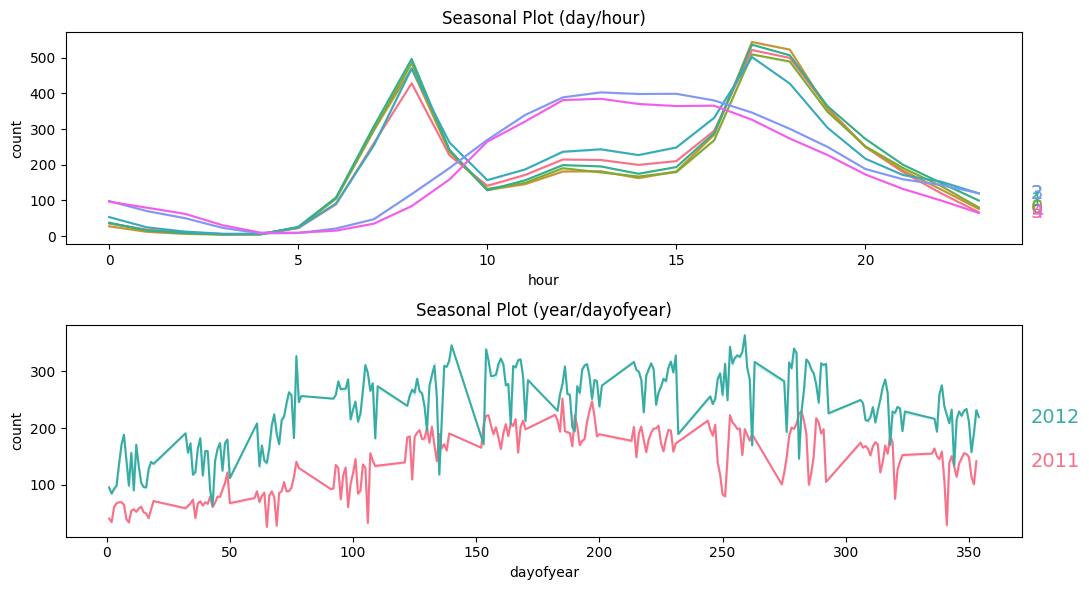

In [93]:
X = df.copy()
X.drop(["year","day","month","hour"],axis=1,inplace=True)
X["day"] = X.index.dayofweek  # the x-axis (freq)
X["week"] = X.index.week  # the seasonal period (period)
X["dayofyear"] = X.index.dayofyear
X["year"] = X.index.year
X["hour"] = X.index.hour

fig, (ax0, ax1) = plt.subplots(2, 1, figsize=(11, 6))
seasonal_plot(X, y="count", period="day", freq="hour", ax=ax0)
seasonal_plot(X, y="count", period="year", freq="dayofyear", ax=ax1);
plt.tight_layout()
plt.show()

In [116]:
X.drop(["day","week","dayofyear","temp"],axis=1,inplace=True)

In [118]:
X.drop(["hour"],axis=1,inplace=True)

In [119]:
X

,season,holiday,workingday,weather,atemp,humidity,windspeed,count,year
datetime,,,,,,,,,
2011-01-01 00:00,1,0,0,1,14.395,81,0.0000,16,2011
2011-01-01 01:00,1,0,0,1,13.635,80,0.0000,40,2011
2011-01-01 02:00,1,0,0,1,13.635,80,0.0000,32,2011
2011-01-01 03:00,1,0,0,1,14.395,75,0.0000,13,2011
2011-01-01 04:00,1,0,0,1,14.395,75,0.0000,1,2011
...,...,...,...,...,...,...,...,...,...
2012-12-19 19:00,4,0,1,1,19.695,50,26.0027,336,2012
2012-12-19 20:00,4,0,1,1,17.425,57,15.0013,241,2012
2012-12-19 21:00,4,0,1,1,15.910,61,15.0013,168,2012


<ipython-input-106-1f2d02a4a173>:3: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  fs = pd.Timedelta("365D") / pd.Timedelta("1H")


<Axes: title={'center': 'Periodogram'}, ylabel='Variance'>

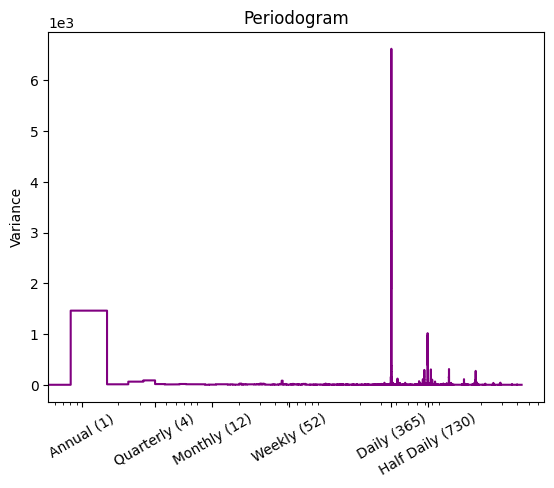

In [107]:
plot_periodogram(X["count"])

Strong daily seasonality!

#### Weekly Trend

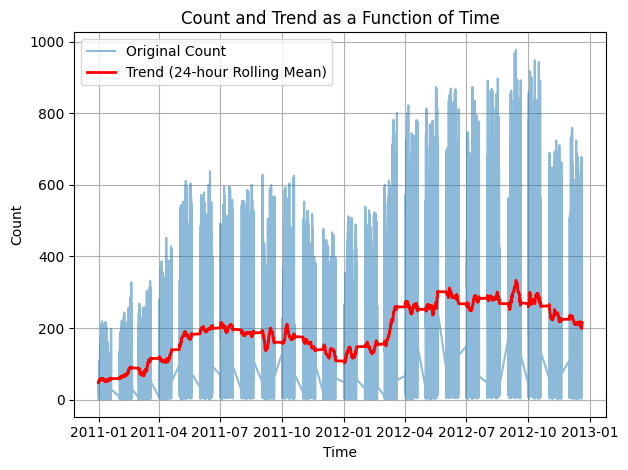

In [115]:
trend = X["count"].rolling(window=168, center=True, min_periods=84).mean()

# Plot the original data and the trend
plt.figure()
plt.plot(X.index.to_timestamp(), X["count"], label="Original Count", alpha=0.5)
plt.plot(X.index.to_timestamp(), trend, label="Trend (24-hour Rolling Mean)", color="red", linewidth=2)
plt.title("Count and Trend as a Function of Time")
plt.xlabel("Time")
plt.ylabel("Count")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

### Create timeseries feaure

In [120]:
from os import times
from statsmodels.tsa.deterministic import CalendarFourier, DeterministicProcess

fourier = CalendarFourier(freq="A", order=4)  # 4 sin/cos pairs for "A"nnual seasonality

dp = DeterministicProcess(
    index=X.index,
    constant=True,               # dummy feature for bias (y-intercept)
    order=3,                     # trend (order 1 means linear)
    seasonal=True,               # weekly seasonality (indicators)
    additional_terms=[fourier],  # annual seasonality (fourier)
    drop=True,                   # drop terms to avoid collinearity
)

timeseries_features = dp.in_sample()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/deterministic.py:569: FutureWarning: 'A' is deprecated and will be removed in a future version, please use 'YE' instead.
  index = pd.date_range("2020-01-01", freq=freq, periods=1)


In [121]:
timeseries_features

,const,trend,trend_squared,trend_cubed,"s(2,24)","s(3,24)","s(4,24)","s(5,24)","s(6,24)","s(7,24)",...,"s(23,24)","s(24,24)","sin(1,freq=YE-DEC)","cos(1,freq=YE-DEC)","sin(2,freq=YE-DEC)","cos(2,freq=YE-DEC)","sin(3,freq=YE-DEC)","cos(3,freq=YE-DEC)","sin(4,freq=YE-DEC)","cos(4,freq=YE-DEC)"
datetime,,,,,,,,,,,,,,,,,,,,,
2011-01-01 00:00,1.0,1.0,1.0,1.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000
2011-01-01 01:00,1.0,2.0,4.0,8.000000e+00,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000717,1.000000,0.001435,0.999999,0.002152,0.999998,0.002869,0.999996
2011-01-01 02:00,1.0,3.0,9.0,2.700000e+01,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.001435,0.999999,0.002869,0.999996,0.004304,0.999991,0.005738,0.999984
2011-01-01 03:00,1.0,4.0,16.0,6.400000e+01,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.002152,0.999998,0.004304,0.999991,0.006455,0.999979,0.008607,0.999963
2011-01-01 04:00,1.0,5.0,25.0,1.250000e+02,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.002869,0.999996,0.005738,0.999984,0.008607,0.999963,0.011476,0.999934
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012-12-19 19:00,1.0,10882.0,118417924.0,1.288624e+12,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,-0.208052,0.978118,-0.406998,0.913429,-0.588132,0.808765,-0.743528,0.668705
2012-12-19 20:00,1.0,10883.0,118439689.0,1.288979e+12,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,-0.207352,0.978266,-0.405691,0.914010,-0.586396,0.810025,-0.741611,0.670830
2012-12-19 21:00,1.0,10884.0,118461456.0,1.289334e+12,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,-0.206652,0.978414,-0.404383,0.914590,-0.584656,0.811281,-0.739689,0.672949


# Regression without TimeSeries

## Preprocess

### Outliers

<ipython-input-41-27b320040473>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
<ipython-input-41-27b320040473>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
<ipython-input-41-27b320040473>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
<ipython-input-41-27b320040473>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


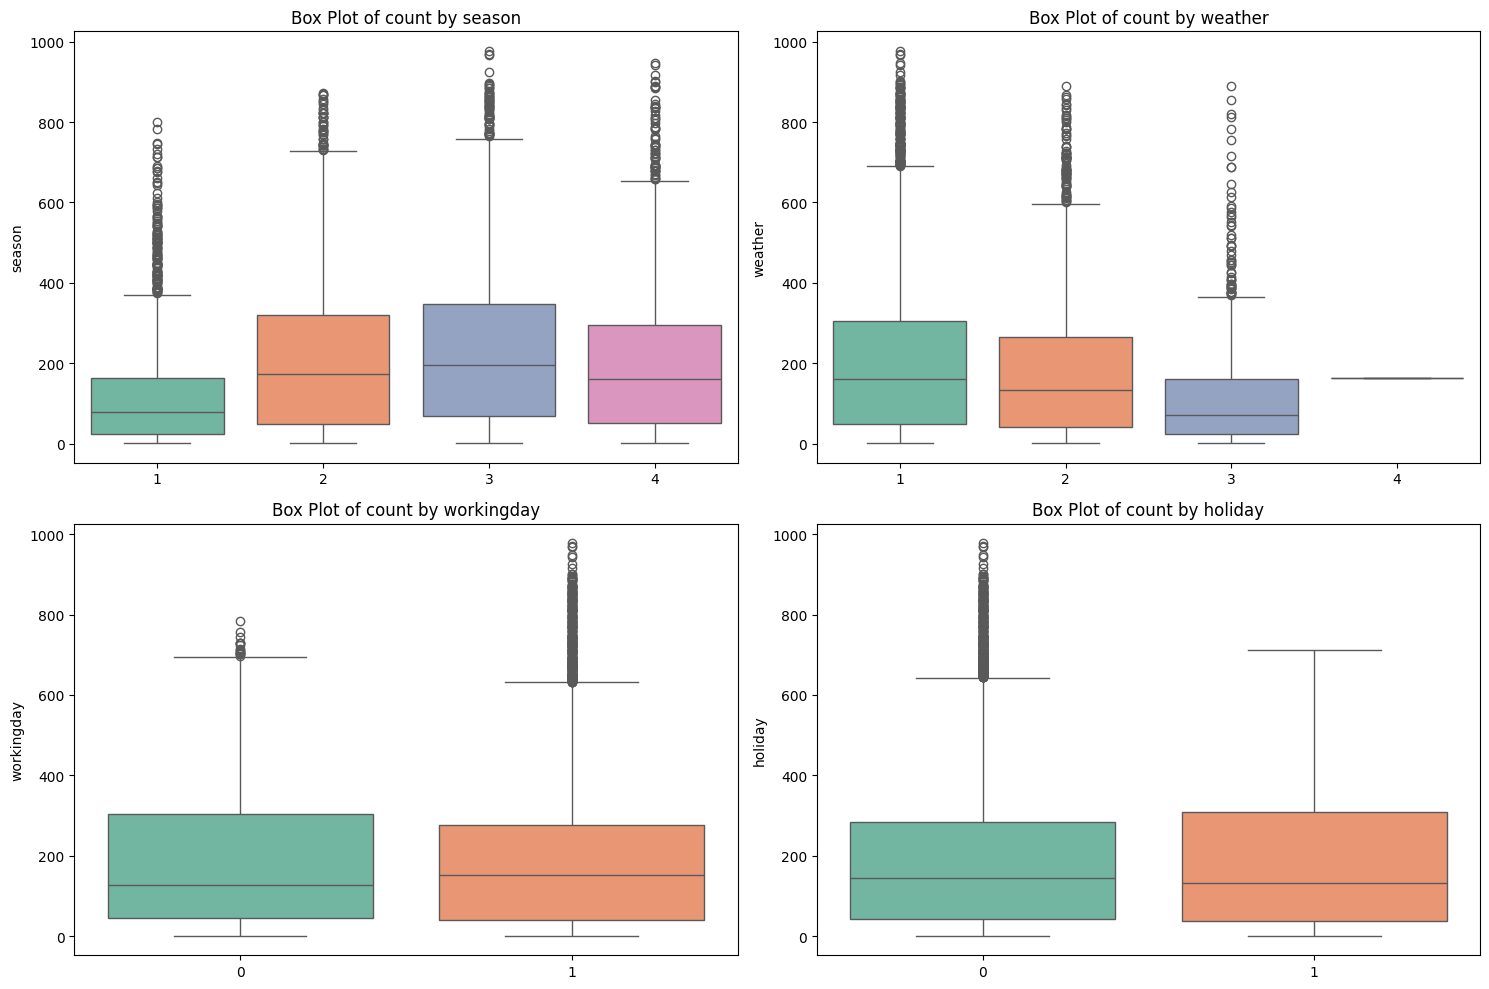

In [41]:
plt.figure(figsize=(15, 10))
for i, feature in enumerate(categorical_features, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(
        data=df,
        x= feature,
        y="count",
        palette="Set2"
    )
    plt.title(f"Box Plot of count by {feature}")
    plt.xlabel("")
    plt.ylabel(feature)

plt.tight_layout()
plt.show()

In [42]:
def drop_outlier(df, feature):
  IQR = 1.5 * (df[feature].quantile(0.75) - df[feature].quantile(0.25))
  LowerBound = df[feature].quantile(0.75) - IQR
  UpperBound = df[feature].quantile(0.75) + IQR

  outlier_indices = df[(df[feature] < LowerBound) | (df[feature] > UpperBound)].index
  df_new = df.drop(outlier_indices,inplace=False)
  return df_new

df_dropped = drop_outlier(df, 'count')

In [49]:
def drop_outlier_by_season(df, feature, group_feature):
    def remove_outliers(group):
        IQR = 1.5 * (group[feature].quantile(0.75) - group[feature].quantile(0.25))
        LowerBound = group[feature].quantile(0.25) - IQR
        UpperBound = group[feature].quantile(0.75) + IQR

        # Remove outliers for the group
        return group[(group[feature] >= LowerBound) & (group[feature] <= UpperBound)]

    # Apply outlier removal to each group
    df_new = df.groupby(group_feature, group_keys=False).apply(remove_outliers)
    return df_new

df_dropped = drop_outlier_by_season(df, feature='count', group_feature='season')
df_dropped = drop_outlier_by_season(df_dropped, feature='count', group_feature='weather')

<ipython-input-49-8fecb54b44f1>:11: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_new = df.groupby(group_feature, group_keys=False).apply(remove_outliers)
<ipython-input-49-8fecb54b44f1>:11: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_new = df.groupby(group_feature, group_keys=False).apply(remove_outliers)


<ipython-input-50-3dcc770beac3>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
<ipython-input-50-3dcc770beac3>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
<ipython-input-50-3dcc770beac3>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
<ipython-input-50-3dcc770beac3>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


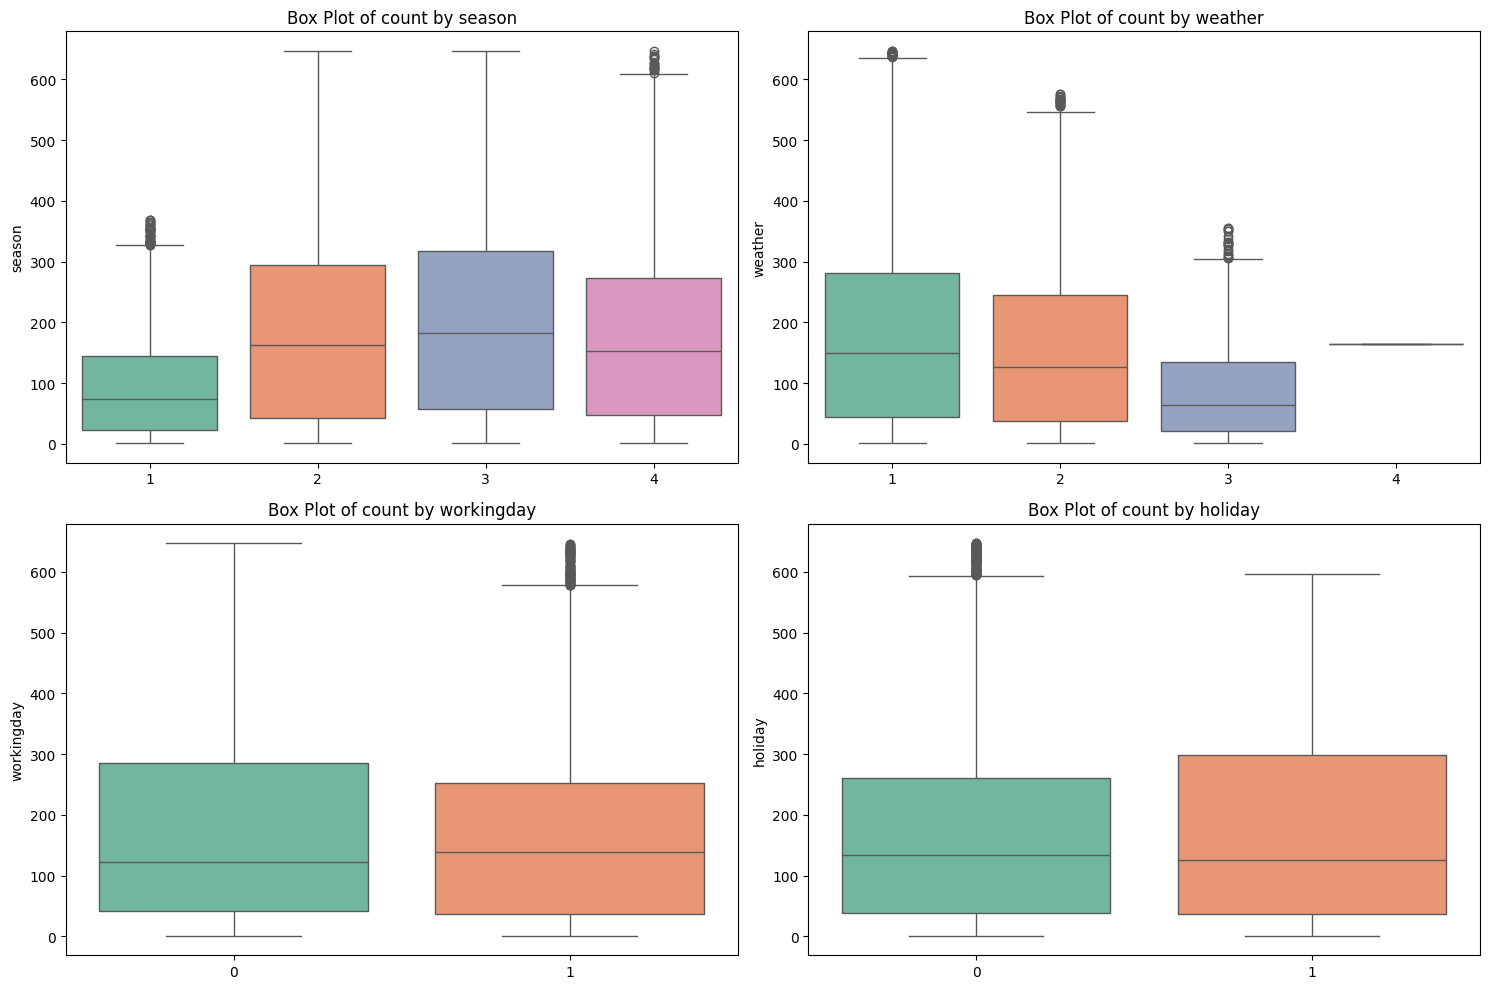

In [50]:
plt.figure(figsize=(15, 10))
for i, feature in enumerate(categorical_features, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(
        data=df_dropped,
        x= feature,
        y="count",
        palette="Set2"
    )
    plt.title(f"Box Plot of count by {feature}")
    plt.xlabel("")
    plt.ylabel(feature)

plt.tight_layout()
plt.show()

In [51]:
df_dropped.drop(['temp'],axis=1,inplace=True)
df_dropped.drop(['windspeed'],axis=1,inplace=True)
df_dropped.drop(['day'],axis=1,inplace=True)

In [72]:
df_dropped.drop(['datetime'],axis=1,inplace=True)

KeyError: "['datetime'] not found in axis"

### Transform

In [57]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, FunctionTransformer, OneHotEncoder, OrdinalEncoder
from sklearn.pipeline import Pipeline

In [303]:
df_dropped.dtypes

,0
season,int64
holiday,int64
workingday,int64
weather,int64
atemp,float64
humidity,int64
count,int64
year,int32
month,int32
hour,int32


In [240]:
numerical_pipeline = Pipeline([
    ("standardize", StandardScaler()),  # Standardize 'atemp' and 'humidity'
])


sqrt_pipeline = Pipeline([
    ("sqrt_transform", FunctionTransformer(np.sqrt, feature_names_out="one-to-one")),  # Square root transform 'count'
        ("scaler", StandardScaler())  # Standardize after sqrt transformation
])

categorical_pipeline_onehot = Pipeline([
    ("onehot", OneHotEncoder(drop="first", sparse_output=False))  # One-hot encode
])

categorical_pipeline_ordinal = Pipeline([
    ("ordinal", OrdinalEncoder())
])

preprocessing_pipeline = ColumnTransformer(
    transformers=[
        ("num_standardize", numerical_pipeline, ["atemp", "humidity"]),
        #("num_sqrt", sqrt_pipeline, ["count"]),
        ("cat_onehot", categorical_pipeline_onehot, ["season", "weather", "month", "hour"]),
        ("cat_ordinal", categorical_pipeline_ordinal, ["holiday", "workingday", "year"]),
    ],
    remainder="passthrough"  # Keep any other columns unchanged (if necessary)
)

X_transformed = preprocessing_pipeline.fit_transform(df_dropped)
categorical_onehot_features = preprocessing_pipeline.named_transformers_["cat_onehot"]["onehot"].get_feature_names_out(
    ["season", "weather", "month", "hour"]
)

columns_transformed = (
    ["atemp", "humidity"]  # Transformed numerical features
    + list(categorical_onehot_features)  # One-hot encoded features
    + ["holiday", "workingday","year"]  # Ordinal encoded features
    + ["count"]  # Unchanged feature
)


# Convert the result back to a DataFrame
df_transformed = pd.DataFrame(X_transformed, columns=columns_transformed)


In [241]:
df_transformed

,atemp,humidity,season_2,season_3,season_4,weather_2,weather_3,weather_4,month_2,month_3,...,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23,holiday,workingday,year,count
0,-1.069149,0.975841,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,16.0
1,-1.158674,0.923761,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,40.0
2,-1.158674,0.923761,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,32.0
3,-1.069149,0.663359,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13.0
4,-1.069149,0.663359,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10384,-0.533763,1.965369,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,5.0
10385,-0.355301,1.652886,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,302.0
10386,-0.266365,1.652886,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,47.0
10387,0.001622,-0.742811,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,313.0


## Metrics

In [62]:
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold

In [373]:
X = df_transformed.drop('count', axis=1)
y = df_transformed['count']
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, shuffle=False)

In [374]:
y_train = np.log1p(y_train)
y_test = np.log1p(y_test)

In [64]:
from sklearn.metrics import mean_squared_log_error, mean_squared_error, mean_absolute_error, r2_score

In [144]:
def metrics_calculator(clf, X_test, y_test, model_name):
    '''
    This function calculates all desired performance metrics for a given model on test data.
    '''
    y_pred = clf.predict(X_test)
    y_test = np.exp(y_test)
    y_pred = np.exp(y_pred)
    result = pd.DataFrame(data=[r2_score(y_test, y_pred),
                                mean_squared_error(y_test, y_pred),
                                mean_squared_log_error(y_test, y_pred),
                                np.sqrt(mean_squared_log_error(y_test, y_pred))],
                          index=['R2','MSE','MSLE','RMSLE'],
                          columns = [model_name])
    return result

In [137]:
from sklearn.metrics import make_scorer

In [138]:
def tune_clf_hyperparameters(clf, param_grid, X_train, y_train):

    neg_msle = make_scorer(mean_squared_log_error, greater_is_better=False)

    clf_grid = GridSearchCV(clf, param_grid, cv=5, scoring=neg_msle, n_jobs=-1)

    clf_grid.fit(X_train, y_train)

    # Get the best hyperparameters
    print("Best hyperparameters:\n", clf_grid.best_params_)

    # Return best_estimator_ attribute which gives us the best model that has been fitted to the training data
    return clf_grid.best_estimator_

## Linear/Ridge Regression

In [66]:
from sklearn.linear_model import LinearRegression, Ridge

In [67]:
ridge_params = {'alpha':[0.001,0.003, 0.01,0.03, 0.1, 1, 3, 10, 30, 100, 300, 1000]}

In [106]:
ridge_model = Ridge()

ridge_opt = tune_clf_hyperparameters(ridge_model, ridge_params, X_train, y_train)

Best hyperparameters:
 {'alpha': 0.001}


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:1103: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan]
  warnings.warn(


In [87]:
y_pred = ridge_opt.predict(X_test)
print(ridge_opt.score(X_test, y_test))

0.8024176310998489


<ipython-input-108-6ad165c42bd9>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(np.exp(y_pred)-1,label='pred')
<ipython-input-108-6ad165c42bd9>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(np.exp(y_test)-1,label='test')


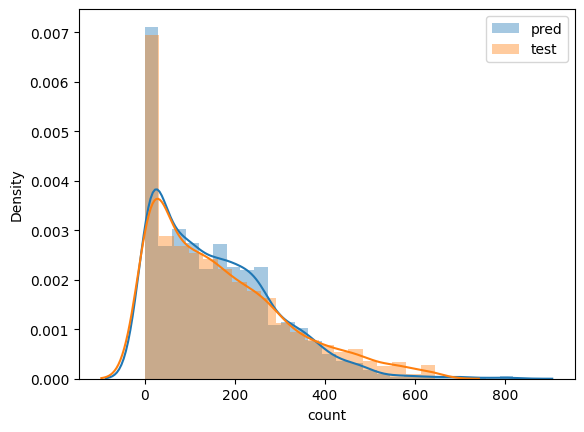

In [108]:
sns.distplot(np.exp(y_pred)-1,label='pred')
sns.distplot(np.exp(y_test)-1,label='test')
plt.legend()
plt.show()

In [107]:
metrics_calculator(ridge_opt, X_test, y_test, 'Ridge')

,Ridge
R2,0.700100
MSE,6639.301752
MSLE,0.358377
RMSLE,0.598646


In [90]:
def rmsle(y, y_,convertExp=True):
    if convertExp:
        y = np.exp(y),
        y_ = np.exp(y_)
    log1 = np.nan_to_num(np.array([np.log(v + 1) for v in y]))
    log2 = np.nan_to_num(np.array([np.log(v + 1) for v in y_]))
    calc = (log1 - log2) ** 2
    return np.sqrt(np.mean(calc))

In [109]:
print ("RMSLE Value For Linear Regression: ",rmsle(np.exp(y_test),np.exp(y_pred),False))

RMSLE Value For Linear Regression:  0.5731938733216859


## Random Forest

In [150]:
param_grid = {
    'n_estimators': [50, 100,200],
    'max_depth': np.arange(3, 15, 2),
}

In [151]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()

rf_opt = tune_clf_hyperparameters(rf, param_grid, X_train, y_train)

Best hyperparameters:
 {'max_depth': 13, 'n_estimators': 100}


In [158]:
y_pred = rf_opt.predict(X_test)
print(rf_opt.score(X_test, y_test))

0.8348483740560456


<ipython-input-159-6ad165c42bd9>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(np.exp(y_pred)-1,label='pred')
<ipython-input-159-6ad165c42bd9>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(np.exp(y_test)-1,label='test')


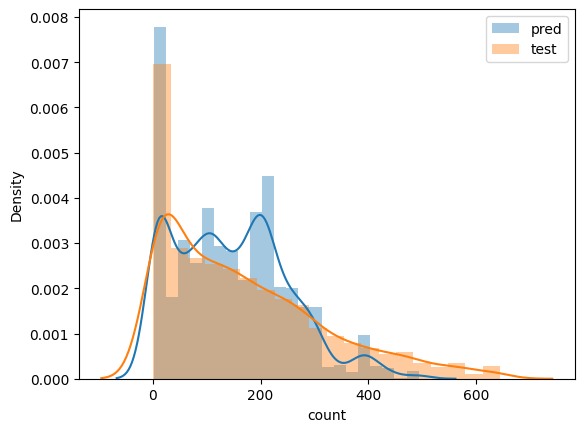

In [159]:
sns.distplot(np.exp(y_pred)-1,label='pred')
sns.distplot(np.exp(y_test)-1,label='test')
plt.legend()
plt.show()

In [161]:
metrics_calculator(rf_opt, X_test, y_test, 'RF')

,RF
R2,0.647350
MSE,7807.091485
MSLE,0.280533
RMSLE,0.529654


## XGBoost

In [121]:
import xgboost as xg

In [139]:
param_grid = {
    'n_estimators': [50, 100, 200],          # Number of trees in the ensemble
    #'learning_rate': [0.01, 0.05, 0.1],       # Step size shrinkage
    'max_depth': [4, 6, 8],                   # Maximum depth of a tree
    'min_child_weight': [2, 4, 6],            # Minimum sum of weights for a child node
    'subsample': [0.6, 0.8],             # Fraction of samples used for each tree
    'colsample_bytree': [0.6, 0.8],      # Fraction of features used per tree
    # 'gamma': [0, 0.1, 0.2],                   # Minimum loss reduction for a split
    # 'reg_alpha': [0, 0.1, 1.0],               # L1 regularization term
    # 'reg_lambda': [1.0, 2.0, 3.0],            # L2 regularization term
}

In [140]:
xgr = xg.XGBRegressor()

xgr_opt = tune_clf_hyperparameters(xgr, param_grid, X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:1103: UserWarning: One or more of the test scores are non-finite: [-0.01228868 -0.01229404         nan -0.01050867         nan -0.0093921
 -0.01226598 -0.01230187         nan         nan         nan -0.00932867
 -0.01215468 -0.01225819         nan -0.010481   -0.00920453         nan
 -0.01074624 -0.01084125 -0.00981881 -0.00986019 -0.00955893 -0.00941347
 -0.01073768 -0.01084677 -0.00979274 -0.00974137 -0.00933909 -0.00933054
 -0.01060445 -0.01072261 -0.00963695 -0.00962071 -0.00913012 -0.00920943
 -0.0106319  -0.01060629 -0.01028851         nan -0.01050115         nan
 -0.01044319 -0.01020526 -0.00993844 -0.00979349 -0.00994321 -0.00972913
 -0.01020133 -0.01010707 -0.00987553 -0.00953846 -0.00982985 -0.00942141
 -0.01173075 -0.01220708         nan -0.01044087         nan         nan
 -0.01162717 -0.01214268         nan -0.01036346 -0.00919582         nan
 -0.01180553 -0.01239977 -0.01033684 -0.01036274         

Best hyperparameters:
 {'colsample_bytree': 0.8, 'max_depth': 6, 'min_child_weight': 6, 'n_estimators': 200, 'subsample': 0.8}


In [377]:
xgr_opt=xg.XGBRegressor(n_estimators = 200, max_depth=6,min_child_weight=6,colsample_bytree=0.8,subsample=0.8)
xgr_opt.fit(X_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=6, max_leaves=None,
             min_child_weight=6, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=200, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

0.7371941884663482


<ipython-input-378-00d4e1b7058a>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(np.exp(y_pred)-1,label='pred')
<ipython-input-378-00d4e1b7058a>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(np.exp(y_test)-1,label='test')


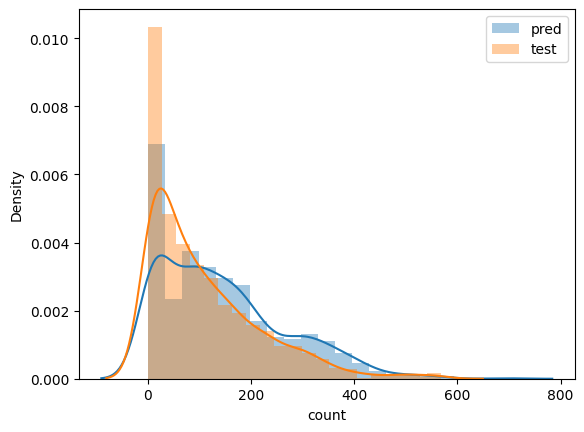

In [378]:
y_pred = xgr_opt.predict(X_test)
print(xgr_opt.score(X_test, y_test))

sns.distplot(np.exp(y_pred)-1,label='pred')
sns.distplot(np.exp(y_test)-1,label='test')
plt.legend()
plt.show()

In [379]:
metrics_calculator(xgr_opt, X_test, y_test, 'XG')

,XG
R2,0.384729
MSE,7259.922640
MSLE,0.449086
RMSLE,0.670138


# Regression with TimeSeries

In [293]:
df_time = df.copy()
df_time

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,year,month,day,hour
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,16,2011,1,1,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,40,2011,1,1,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,32,2011,1,1,2
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,13,2011,1,1,3
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,1,2011,1,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,336,2012,12,19,19
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,241,2012,12,19,20
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,168,2012,12,19,21
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,129,2012,12,19,22


In [296]:
df_time.drop(["windspeed","temp"], axis=1, inplace=True)
df_time.drop(['year','month','day','hour'],axis=1, inplace=True)

In [297]:
df_time = drop_outlier_by_season(df_time, feature='count', group_feature='season')
df_time = drop_outlier_by_season(df_time, feature='count', group_feature='weather')

<ipython-input-49-8fecb54b44f1>:11: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_new = df.groupby(group_feature, group_keys=False).apply(remove_outliers)
<ipython-input-49-8fecb54b44f1>:11: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_new = df.groupby(group_feature, group_keys=False).apply(remove_outliers)


In [298]:
df_time['datetime'].astype('object')

,datetime
0,2011-01-01 00:00:00
1,2011-01-01 01:00:00
2,2011-01-01 02:00:00
3,2011-01-01 03:00:00
4,2011-01-01 04:00:00
...,...
10818,2012-12-17 04:00:00
10830,2012-12-17 16:00:00
10837,2012-12-17 23:00:00
10850,2012-12-18 12:00:00


In [299]:
df_time.dtypes

,0
datetime,datetime64[ns]
season,int64
holiday,int64
workingday,int64
weather,int64
atemp,float64
humidity,int64
count,int64


In [310]:
# Corrected pipeline
log_pipeline = Pipeline([
    ("log_transform", FunctionTransformer(np.log1p, feature_names_out="one-to-one"))
])

# Exclude 'datetime' from transformations
preprocessing_pipeline = ColumnTransformer(
    transformers=[
        ("num_standardize", numerical_pipeline, ["atemp", "humidity"]),
        ("cat_onehot", categorical_pipeline_onehot, ["season", "weather"]),
        ("cat_ordinal", categorical_pipeline_ordinal, ["holiday", "workingday"]),
        ("log1p", log_pipeline, ["count"]),
    ],
    remainder="passthrough"  # Ensure 'datetime' remains unchanged
)

datetime_column = df_time["datetime"]

# Apply pipeline
X_time = preprocessing_pipeline.fit_transform(df_time.drop(columns=["datetime"]))


categorical_onehot_features = preprocessing_pipeline.named_transformers_["cat_onehot"]["onehot"].get_feature_names_out(
    ["season", "weather"]
)

columns_transformed = (
    ["atemp", "humidity"]  # Transformed numerical features
    + list(categorical_onehot_features)  # One-hot encoded features
    + ["holiday", "workingday"]  # Ordinal encoded features
    + ["count"]  # Unchanged feature
)


# Convert the result back to a DataFrame
df_time = pd.DataFrame(X_time, columns=columns_transformed)
df_time["datetime"] = datetime_column.values

In [313]:
df_time.dtypes

,0
atemp,float64
humidity,float64
season_2,float64
season_3,float64
season_4,float64
weather_2,float64
weather_3,float64
weather_4,float64
holiday,float64
workingday,float64


In [251]:
df_time["atemp"] = df_time["atemp"].astype(float)      # Numerical column
df_time["humidity"] = df_time["humidity"].astype(float)  # Numerical column

# Ensure categorical features are integers or categories
for col in categorical_onehot_features:
    df_time[col] = df_time[col].astype(int)

# Ordinal features
df_time["holiday"] = df_time["holiday"].astype(int)
df_time["workingday"] = df_time["workingday"].astype(int)

# Restore datetime and count to their appropriate types
df_time["count"] = df_time["count"].astype(float)          # Convert count

In [252]:
df_time.dtypes

,0
atemp,float64
humidity,float64
season_2,int64
season_3,int64
season_4,int64
weather_2,int64
weather_3,int64
weather_4,int64
holiday,int64
workingday,int64


In [314]:
df_time['datetime'] = pd.to_datetime(df_time['datetime'])
df_time.set_index('datetime', inplace=True)
df_time.index = df_time.index.to_period('H')

<ipython-input-314-09bbea8e32c1>:3: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df_time.index = df_time.index.to_period('H')


In [324]:
df_time

,atemp,humidity,season_2,season_3,season_4,weather_2,weather_3,weather_4,holiday,workingday,count
datetime,,,,,,,,,,,
2011-01-01 00:00,-1.069149,0.975841,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.833213
2011-01-01 01:00,-1.158674,0.923761,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.713572
2011-01-01 02:00,-1.158674,0.923761,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.496508
2011-01-01 03:00,-1.069149,0.663359,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.639057
2011-01-01 04:00,-1.069149,0.663359,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.693147
...,...,...,...,...,...,...,...,...,...,...,...
2012-12-17 04:00,-0.533763,1.965369,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.791759
2012-12-17 16:00,-0.355301,1.652886,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,5.713733
2012-12-17 23:00,-0.266365,1.652886,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,3.871201


In [316]:
df_time.dtypes

,0
atemp,float64
humidity,float64
season_2,float64
season_3,float64
season_4,float64
weather_2,float64
weather_3,float64
weather_4,float64
holiday,float64
workingday,float64


In [ ]:
pip install statsmodels

In [335]:
from statsmodels.tsa.deterministic import CalendarFourier, DeterministicProcess

fourier = CalendarFourier(freq="A", order=10)  # 4 sin/cos pairs for "A"nnual seasonality

dp = DeterministicProcess(
    index=df_time.index,
    constant=True,               # dummy feature for bias (y-intercept)
    order=1,                     # trend (order 1 means linear)
    seasonal=True,               # weekly seasonality (indicators)
    #additional_terms=[fourier],  # annual seasonality (fourier)
    drop=True,                   # drop terms to avoid collinearity
)

timeseries_features = dp.in_sample()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/deterministic.py:569: FutureWarning: 'A' is deprecated and will be removed in a future version, please use 'YE' instead.
  index = pd.date_range("2020-01-01", freq=freq, periods=1)


In [336]:
df_timed = pd.concat([df_time,timeseries_features],axis=1)

In [337]:
df_timed.shape

(10389, 36)

In [338]:
X = df_timed.drop('count', axis=1)
y = df_timed['count']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [259]:
print(y_train.dtypes)

float64


In [260]:
# y_train = np.log1p(y_train)
# y_test = np.log1p(y_test)

In [332]:
ridge_params = {'alpha':[0.001, 0.01, 0.1, 1, 10, 100, 1000]}

In [339]:
ridge_model = Ridge()

ridge_opt = tune_clf_hyperparameters(ridge_model, ridge_params, X_train, y_train)

Best hyperparameters:
 {'alpha': 1}


0.27670898825489554


<ipython-input-340-0b5940446800>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(np.exp(y_pred)-1,label='pred')
<ipython-input-340-0b5940446800>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(np.exp(y_test)-1,label='test')


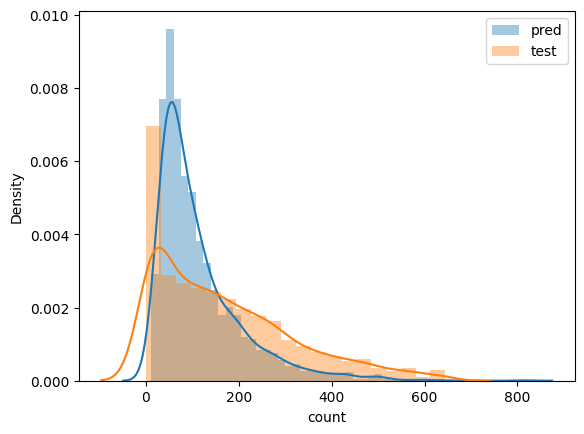

In [340]:
y_pred = ridge_opt.predict(X_test)
print(ridge_opt.score(X_test, y_test))
sns.distplot(np.exp(y_pred)-1,label='pred')
sns.distplot(np.exp(y_test)-1,label='test')
plt.legend()
plt.show()

In [264]:
metrics_calculator(ridge_opt, X_test, y_test, 'Ridge')

,Ridge
R2,0.173273
MSE,18302.389110
MSLE,1.204191
RMSLE,1.097356


In [270]:
param_grid = {
    'n_estimators': [50, 100, 200],          # Number of trees in the ensemble
    #'learning_rate': [0.01, 0.05, 0.1],       # Step size shrinkage
    'max_depth': [4, 6, 8],                   # Maximum depth of a tree
    'min_child_weight': [2, 4, 6],            # Minimum sum of weights for a child node
    'subsample': [0.6, 0.8],             # Fraction of samples used for each tree
    'colsample_bytree': [0.6, 0.8],      # Fraction of features used per tree
    # 'gamma': [0, 0.1, 0.2],                   # Minimum loss reduction for a split
    # 'reg_alpha': [0, 0.1, 1.0],               # L1 regularization term
    # 'reg_lambda': [1.0, 2.0, 3.0],            # L2 regularization term
}

xgr = xg.XGBRegressor()

xgr_opt = tune_clf_hyperparameters(xgr, param_grid, X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:1103: UserWarning: One or more of the test scores are non-finite: [-0.0691622  -0.06781014 -0.06642606 -0.06476295 -0.06353044 -0.06112459
 -0.06862987 -0.06816938 -0.06636082 -0.06502383 -0.06369248 -0.06133751
 -0.0692743  -0.06799354 -0.06689566 -0.06522501 -0.06412428 -0.06162606
 -0.0655883  -0.06412898 -0.06371795 -0.06105607 -0.06107893 -0.05769749
 -0.06550585 -0.06366585 -0.06288395 -0.06019466         nan -0.05711194
 -0.06647704 -0.06424375 -0.06391418 -0.06107153 -0.06106804 -0.05732029
 -0.06247437 -0.06009499 -0.06047163 -0.05709188 -0.05880049 -0.0551505
 -0.06272646 -0.05955197 -0.06081167 -0.05717597 -0.05893102 -0.05546732
 -0.06287704 -0.060511   -0.06029398 -0.05802712 -0.05832433 -0.05620328
 -0.06937665 -0.06813224 -0.06676343 -0.06510512 -0.06338512 -0.06130231
 -0.06903983 -0.06851423 -0.06667233 -0.06535484 -0.06364371 -0.06166337
 -0.06940571 -0.0682658  -0.06639287 -0.06563751 -0.06379

Best hyperparameters:
 {'colsample_bytree': 0.6, 'max_depth': 8, 'min_child_weight': 2, 'n_estimators': 200, 'subsample': 0.8}


0.5457427570077167


<ipython-input-271-00d4e1b7058a>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(np.exp(y_pred)-1,label='pred')
<ipython-input-271-00d4e1b7058a>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(np.exp(y_test)-1,label='test')


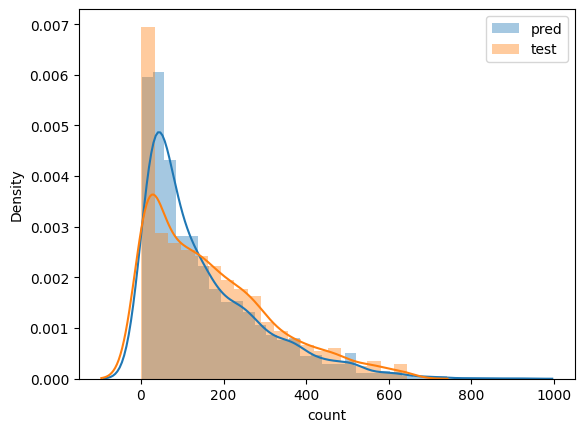

In [271]:
y_pred = xgr_opt.predict(X_test)
print(xgr_opt.score(X_test, y_test))

sns.distplot(np.exp(y_pred)-1,label='pred')
sns.distplot(np.exp(y_test)-1,label='test')
plt.legend()
plt.show()

In [272]:
metrics_calculator(xgr_opt, X_test, y_test, 'XGR')

,XGR
R2,0.435462
MSE,12497.960222
MSLE,0.763087
RMSLE,0.873549


In [349]:
X_test.index

PeriodIndex(['2012-04-03 14:00', '2012-03-05 21:00', '2011-01-17 16:00',
             '2011-10-12 13:00', '2011-07-04 18:00', '2011-08-09 06:00',
             '2011-12-14 02:00', '2011-04-11 12:00', '2011-01-03 23:00',
             '2011-09-19 16:00',
             ...
             '2011-02-11 01:00', '2011-06-17 01:00', '2011-04-06 16:00',
             '2011-02-19 06:00', '2012-02-01 01:00', '2012-07-18 20:00',
             '2012-05-16 03:00', '2011-11-18 14:00', '2012-03-10 01:00',
             '2011-07-08 06:00'],
            dtype='period[h]', name='datetime', length=2078)

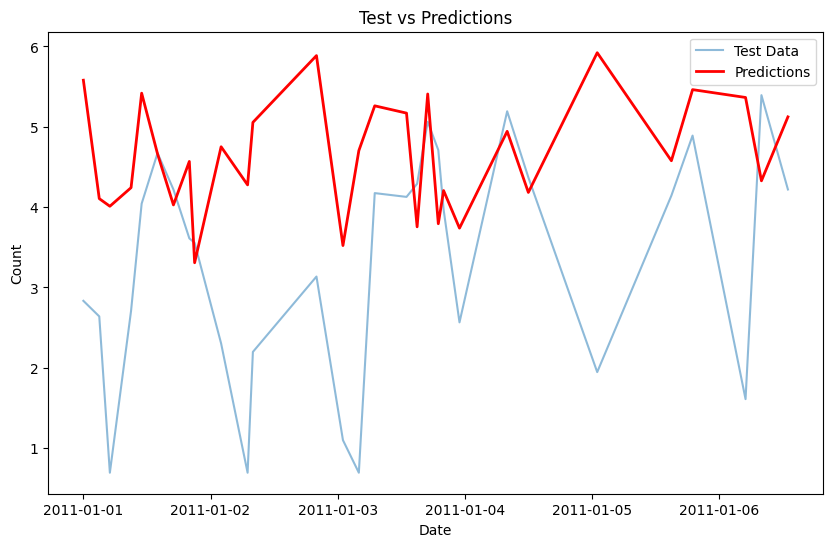

In [366]:
# Convert PeriodIndex to DatetimeIndex
time_index = y_test.index.to_timestamp()  # Convert PeriodIndex to DatetimeIndex

# Plot the test data and predictions
plt.figure(figsize=(10, 6))
plt.plot(time_index[:30], y_test[:30], label="Test Data", alpha=0.5)  # Use y_test directly as it's a Series
plt.plot(time_index[:30], y_pred[:30], label="Predictions", color="red", linewidth=2)
plt.xlabel("Date")
plt.ylabel("Count")
plt.title("Test vs Predictions")
plt.legend()
plt.show()


## Hybrid Model

In [367]:
class BoostedHybrid:
    def __init__(self, model_1, model_2):
        self.model_1 = model_1
        self.model_2 = model_2
        self.y_columns = None  # store column names from fit method

    def fit(self, X_1, X_2, y):
        # YOUR CODE HERE: fit self.model_1
        self.model_1.fit(X_1,y)

        y_fit = pd.DataFrame(
            # YOUR CODE HERE: make predictions with self.model_1
            self.model_1.predict(X_1),
            index=X_1.index, columns=y.columns,
        )

        # YOUR CODE HERE: compute residuals
        y_resid = y - y_fit
        y_resid = y_resid.stack().squeeze() # wide to long

        # YOUR CODE HERE: fit self.model_2 on residuals
        self.model_2.fit(X_2, y_resid)

        # Save column names for predict method
        self.y_columns = y.columns
        # Save data for question checking
        self.y_fit = y_fit
        self.y_resid = y_resid

    def predict(self, X_1, X_2):
        y_pred = pd.DataFrame(
            # YOUR CODE HERE: predict with self.model_1
            self.model_1.predict(X_1),
            index=X_1.index, columns=self.y_columns,
        )
        y_pred = y_pred.stack().squeeze()  # wide to long

        # YOUR CODE HERE: add self.model_2 predictions to y_pred
        y_pred += self.model_2.predict(X_2)

        return y_pred.unstack()  # long to wide

In [371]:
model = BoostedHybrid(model_1=LinearRegression(),model_2=xg.XGBRegressor())


X_1 = timeseries_features
X_2 = df_time.drop('count', axis=1)
y = df_time['count'].to_frame()
# YOUR CODE HERE: Fit and predict
model.fit(X_1, X_2, y)
y_pred = model.predict(X_1,X_2)

<ipython-input-372-5f518556f16f>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(np.exp(y_pred)-1,label='pred')
<ipython-input-372-5f518556f16f>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(np.exp(y)-1,label='test')


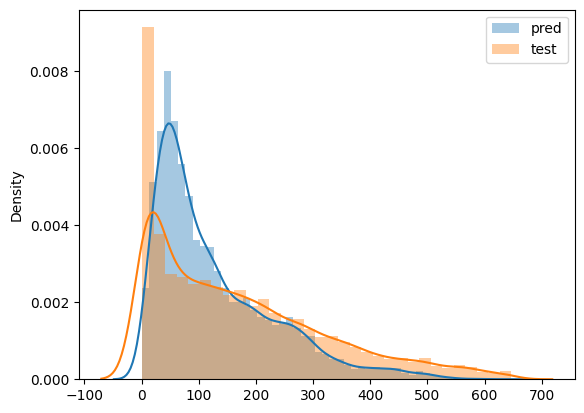

In [372]:
y_pred = model.predict(X_1, X_2)

sns.distplot(np.exp(y_pred)-1,label='pred')
sns.distplot(np.exp(y)-1,label='test')
plt.legend()
plt.show()